<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Ejercicio_Jumanji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

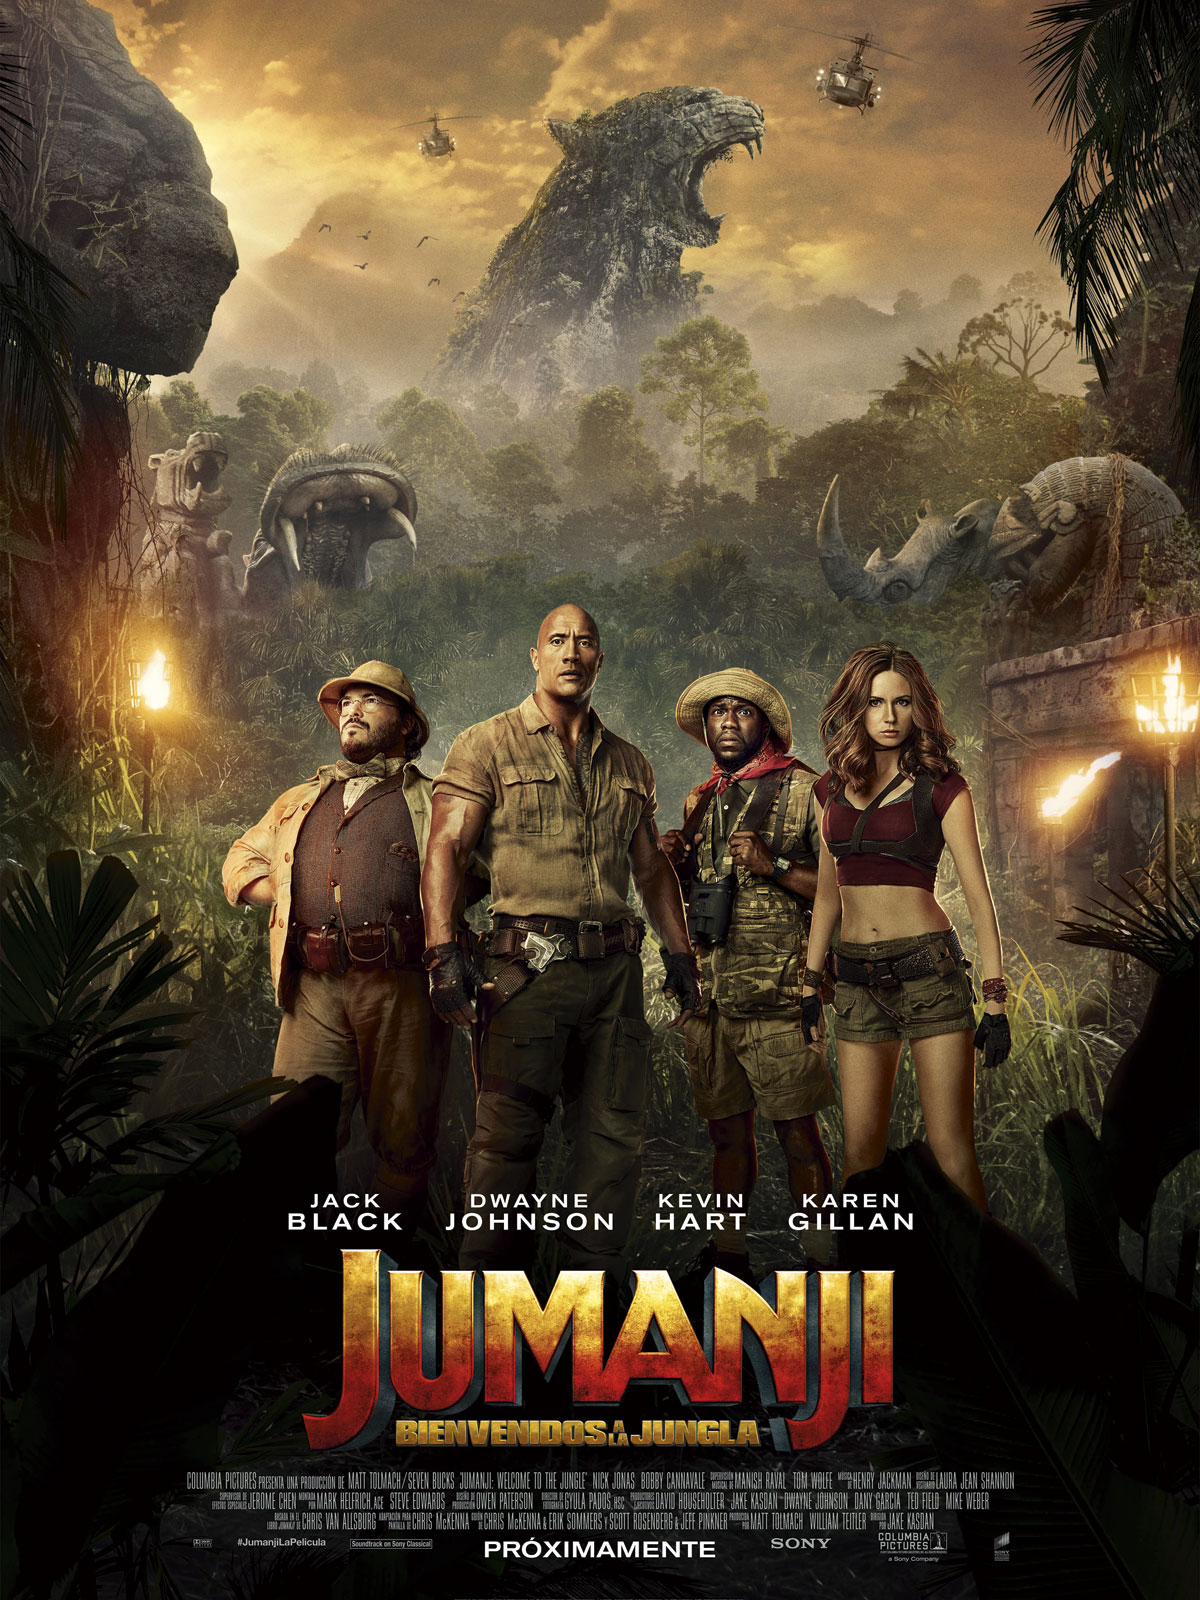

# Ejercicio Jumanji - Bienvenidos a la jungla

Wellcome to Jumanji dear adventurers. Unfortunately not everything are good news, some players have been playing to the game and, as a result of they dumb plays, a stampede of cats and dogs is now running in the real world.

As a fellow explorer I am sure that you understand the urgency of the situation. To solve it, we need to create a computer vision algorithm using CNNs to detect the cats and the dogs.

In order to do so we require the following steps:

- Create an image preprocessing pipeline to treat the images that we are providing. Perform data augmentation over the dataset, at least rotations.

- Test several architechtures (at least 3) and evaluate their performance over the dataset.

- Visualize the feature maps of some of the early and late layers of the models developed. �Is there any feature which could be explained through them?

- Finally select the model which performs the best over the whole dataset and explain why.

Fellow adventurer, thanks for your time, Jumanji will not forget your efforts.

In [103]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageOps, ImageEnhance
import random
import os

In [104]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#    -O /content/cats_and_dogs_filtered.zip
#!unzip cats_and_dogs_filtered.zip

In [105]:
# Definir clase Preprocesado

In [106]:
# Unificar resolución, tamaño, ...

In [107]:
# Separar primero el TRAIN, TEST y x2 VALIDATIONs, y después hacer Data Augmentation al TRAIN y a un(1) VALIDATION; el otro validation y TEST sin augmentation.
# Sacar 2 métricas distintas (una para cada Validation).

Aplicamos Data Augmentation a TRAIN y un VALIDATION para que el modelo sea más robusto ante ciertas variaciones o alteraciones plausibles en casos reales.
Tipos:
- rotation
- blur
- escala de grises
- bajo brillo

In [108]:
import os
cat_files = os.listdir("cats_and_dogs_filtered/train/cats")[0:100]
dog_files = os.listdir("cats_and_dogs_filtered/train/dogs")[0:100]

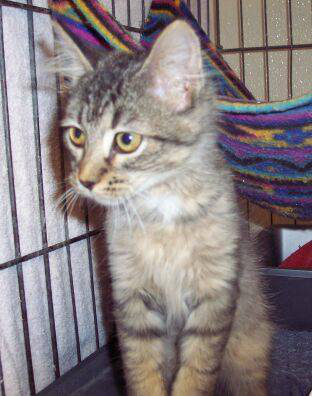

In [109]:
img_1 = Image.open("cats_and_dogs_filtered/train/cats/cat.2.jpg")
img_1

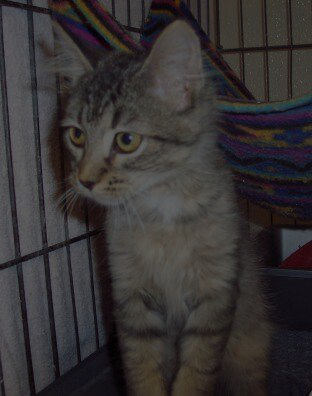

In [110]:
# Función bajo brillo
img_1 = ImageEnhance.Brightness(img_1).enhance(0.4)
img_1

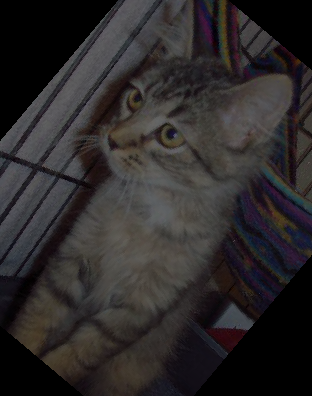

In [111]:
# función rotación
img_1 = img_1.rotate(random.randint(-45, 45))
img_1

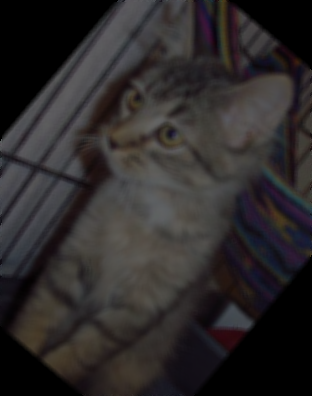

In [112]:
# función blur
img_1 = img_1.filter(ImageFilter.BLUR)
img_1

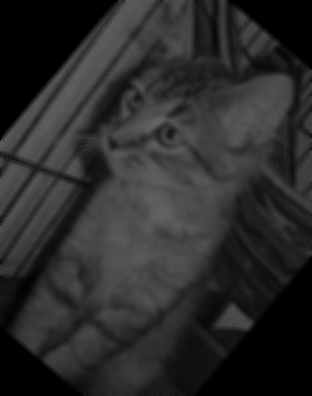

In [113]:
# función escala de grises
img_1 = ImageOps.grayscale(img_1)
img_1

In [90]:
# Funciones data augmentation

def data_aug(entry, i): # i = [ (0:rotation) , (1:blur) , (2:grises) , (3:bajo brillo) ]
    if i==0:
        return entry.rotate(random.randint(-45, 45))
    if i==1:
        return entry.filter(ImageFilter.BLUR)
    if i==2:
        return ImageOps.grayscale(entry)
    if i==3:
        return ImageEnhance.Brightness(entry).enhance(0.4)

In [ ]:
# Selección aleatoria de ¿30%? de muestras del total para cada tipo de data augmentation,
# por separado, así algunas se combinarán entre ellas.

n = 30  # % de muestras modificadas
for i in range(0,4):  # i = [ (0:rotation) , (1:blur) , (2:grises) , (3:bajo brillo) ]
    randomlist = random.sample(range( 0, len(X_train)), (n*len(X_train))//100 )
    for q in randomlist:
        X_train.iloc[q] = data_aug(X_train.iloc[q], i)

In [ ]:
Class Procesado(self, )
    def _init_:

    def

